<a href="https://colab.research.google.com/github/jimjoseph51000/fpl-simulator/blob/main/Player_Swapout_jj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import requests, json
from pprint import pprint

In [2]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [3]:
% cd /gdrive/MyDrive/CSE_519_DSF/Project\ -\ FPL

/gdrive/MyDrive/CSE_519_DSF/Project - FPL


In [4]:
import numpy as np
import pandas as pd
import os
from matplotlib import pyplot as plt

from simulator import *
from model import *
# from util import *

(620,) (620, 10) (620, 10) (2, 620, 10)
cumsum of per_week_total_points:  [ 80. 166. 238. 297. 355. 401. 436. 484. 540. 588.]
(15, 10) (15, 10) (15, 10) (2, 15, 10)


100%|██████████| 10000/10000 [00:13<00:00, 745.92it/s]


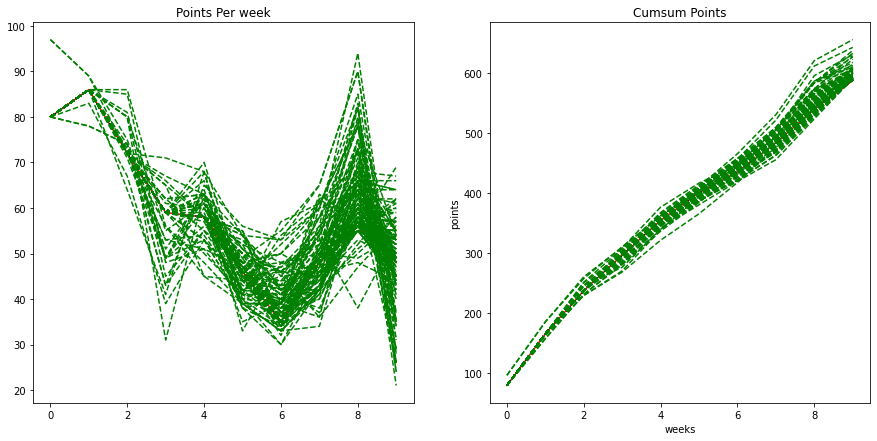

actually_better_plots : 167
[606.0, 602.0, 591.0, 603.0, 599.0, 593.0, 591.0, 600.0, 589.0, 591.0, 589.0, 591.0, 589.0, 593.0, 595.0, 602.0, 589.0, 590.0, 596.0, 589.0, 596.0, 594.0, 592.0, 597.0, 606.0, 591.0, 611.0, 613.0, 591.0, 638.0, 590.0, 589.0, 633.0, 590.0, 596.0, 592.0, 601.0, 596.0, 592.0, 592.0, 593.0, 593.0, 589.0, 643.0, 592.0, 593.0, 590.0, 595.0, 595.0, 593.0, 597.0, 592.0, 607.0, 594.0, 593.0, 589.0, 609.0, 589.0, 596.0, 593.0, 594.0, 589.0, 590.0, 589.0, 592.0, 589.0, 601.0, 589.0, 593.0, 589.0, 618.0, 592.0, 589.0, 591.0, 607.0, 604.0, 590.0, 589.0, 594.0, 591.0, 589.0, 656.0, 631.0, 601.0, 591.0, 596.0, 595.0, 627.0, 593.0, 590.0, 605.0, 615.0, 589.0, 598.0, 608.0, 592.0, 591.0, 594.0, 590.0, 591.0, 600.0, 589.0, 594.0, 592.0, 595.0, 589.0, 600.0, 589.0, 599.0, 590.0, 594.0, 595.0, 591.0, 605.0, 590.0, 590.0, 595.0, 592.0, 590.0, 600.0, 589.0, 600.0, 601.0, 602.0, 598.0, 591.0, 591.0, 595.0, 590.0, 598.0, 593.0, 592.0, 589.0, 594.0, 593.0, 589.0, 608.0, 591.0, 598.0

In [5]:
# main code
fpl_manager_id = '2757'
current_week = 10
env = FPLSimulator(current_week, fpl_manager_id, req_cols=['stats.ict_index','element_type'])

plot_pts = env.sample_visualization(10000)
print(plot_pts)

In [9]:
env.actual_player_other_data.shape , env.all_player_other_data.shape, env.all_player_other_data_cols

((2, 15, 10), (2, 620, 10), ['stats.ict_index', 'element_type'])

In [ ]:
def get_sortd_desc_players(fpl_manager_id,week_no):
  r = requests.get('https://fantasy.premierleague.com/api/entry/'+str(fpl_manager_id)+'/event/'+'1'+'/picks/').json()
  fpl_team = pd.json_normalize(r['picks'])
  players_id_list = fpl_team['element'].tolist()
  players_df_cost = players_df.loc[players_df['id'].isin(players_id_list), ['id','now_cost','element_type']]
  r = requests.get(f"https://fantasy.premierleague.com/api/event/{week_no}/live/").json()
  gw_player_df = pd.json_normalize(r['elements'])
  merged_player_df = pd.merge(gw_player_df, players_df_cost, on=["id"])
  merged_player_df['ROI'] = merged_player_df['stats.total_points']/merged_player_df['now_cost']
  sorted_team_players = merged_player_df.sort_values(['ROI','stats.ict_index'], ascending=[False, False])
  return sorted_team_players

In [12]:
# make sure you this convertion to float since the original variable is in object type
env.actual_player_other_data[0].astype('float')


array([[ 2.8,  1. ,  1.2,  1.2,  1.1,  3. ,  2.1,  1.5,  1.7,  0.4],
       [ 4.1,  4.4, 13.3, 13.1,  9.5,  7.7,  4.4,  0.9, 14.9,  2.2],
       [ 5. ,  9.9,  4.6,  2.2,  2.4,  6.1,  5.9,  2.4,  1.6,  0.1],
       [ 7.1, 18.2,  2.8, 10.1, 11.9,  3.1,  0. , 11.9,  6.2,  5.9],
       [17.7, 11.1, 10.9,  5.5,  7.5, 10.5,  3.9,  4.2,  5. ,  1. ],
       [ 2.7,  2.4, 14. , 17.7,  3. ,  9.8, 15.7,  5.9,  5. ,  6.4],
       [ 9.2,  7.9,  4.7,  5.9, 14.3, 16.2,  3.8,  0. ,  5.9, 15. ],
       [ 0.7,  2.3,  9.5,  7.7, 19.7,  8. ,  7.8, 18.6, 24.5,  0. ],
       [12.9, 20.6, 21.2,  4.3,  8.4, 18.8, 10.4,  2. ,  0.6,  2.4],
       [ 6. ,  6.8,  6.1, 17.8,  6.4,  5.8,  2.2, 12.1, 10.4,  5.1],
       [12. , 14.7,  7. ,  0. , 18.7, 13.9,  6.7,  5.6,  5.9, 12. ],
       [ 0. ,  0. ,  0. ,  0. ,  2.8,  3.6,  1.4,  2.3,  5.9,  0. ],
       [ 4.9,  5. ,  2.9,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
       [ 1.6,  1.4,  1.9,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
       [ 1.4,  1.3,  1.8,  0. ,  0

In [13]:
env.actual_player_other_data

(2, 15, 10)

In [22]:
# def rankings_table():
roi = env.actual_players_points / env.actual_player_cost # (15,10)
ict_index = env.actual_player_other_data[0].astype('float') # (15,10)
# players_ranking_info = np.concatenate((roi[:,:,np.newaxis], ict_index[:,:,np.newaxis]), axis=2) # (15,10,2)


In [23]:
# players_ranking_info[:,0,:].shape , players_ranking_info[:,0,:]

((15, 2), array([[ 0.41407867,  2.8       ],
        [ 0.16025641,  4.1       ],
        [ 0.15313936,  5.        ],
        [ 1.35746606,  7.1       ],
        [ 4.10628019, 17.7       ],
        [ 0.47923323,  2.7       ],
        [ 1.62271805,  9.2       ],
        [ 0.20283976,  0.7       ],
        [ 2.23367698, 12.9       ],
        [ 1.55902004,  6.        ],
        [ 1.22377622, 12.        ],
        [ 0.        ,  0.        ],
        [ 1.24481328,  4.9       ],
        [ 1.59151194,  1.6       ],
        [ 0.4040404 ,  1.4       ]]))

In [42]:
# our current list of players
env.actual_players_ids

array([[ 30,  30,  30,  69,  69,  69,  69,  69, 376, 376],
       [275, 275, 237, 237, 275, 237, 127, 208, 491, 491],
       [418, 245, 418, 418, 418, 418, 418, 119, 208, 418],
       [237, 237, 275, 275, 245, 275, 122, 256, 256, 256],
       [233, 233, 359, 196, 145, 196, 196, 419, 141, 208],
       [215, 215, 233, 233, 289, 233, 233, 289, 289, 141],
       [289, 289, 419, 419, 196, 289, 289, 196, 196, 196],
       [485, 485, 289, 289, 233, 419, 419, 233, 233, 233],
       [413, 413, 413, 413, 419, 413, 413, 307, 307, 307],
       [337, 337, 337, 579, 189, 579, 579, 413, 413, 413],
       [177, 177, 177, 177, 579, 307, 307, 579, 579, 579],
       [376, 376, 376, 376, 376, 376, 376, 376,  69,  69],
       [245, 418, 208, 145, 413, 145, 145, 418, 119, 119],
       [208, 208, 145, 208, 208, 245, 245, 145, 418, 145],
       [145, 145, 245, 245, 237, 208, 208, 122, 145, 289]])

In [43]:
# sorted by roi
roi_sort_idx = np.argsort(roi,axis=0)
dates_idx = np.broadcast_to(np.arange(current_week), roi_sort_idx.shape)
env.actual_players_ids[roi_sort_idx, dates_idx]

array([[376, 376, 376, 413, 413, 275, 122, 196, 119, 208],
       [418, 208, 418, 177, 208, 145, 145, 418, 418, 119],
       [275, 485, 245, 376, 237, 245, 245, 145, 145, 145],
       [485, 145, 208, 145, 418, 208, 208, 122, 289, 289],
       [145, 215, 145, 208,  69, 237, 289, 208, 256,  69],
       [ 30, 233, 419, 245, 275, 579, 418, 376, 376, 418],
       [215,  30,  30, 196, 289, 418, 579, 413, 196, 376],
       [177, 275, 237, 419, 376,  69, 127, 307, 579, 307],
       [245, 418, 337, 289, 145, 289, 376, 579, 307, 256],
       [237, 337, 177, 275, 189, 419, 307, 419, 208, 233],
       [337, 245, 275,  69, 245, 376, 419, 289, 141, 413],
       [208, 237, 359, 418, 579, 233, 413,  69, 413, 491],
       [289, 177, 233, 233, 233, 413, 196, 256,  69, 579],
       [413, 289, 289, 579, 196, 307,  69, 233, 491, 141],
       [233, 413, 413, 237, 419, 196, 233, 119, 233, 196]])